<font size="5">Household Product/Appliance classifier</font><br>

In [0]:
#downloading dataset
!curl --header 'Host: doc-0k-00-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/' --cookie 'AUTH_i0co276fnkof58vmsch70h2gcvn5smgi_nonce=ch8fl7ugq09qm; NID=150=ln9niemS9SdJAek5vTTwND2orZjmuCKQMlq6z4fOUeJwj_dvz741JLKBGLT6M5jafv6xLluOLBklcC3FWFUmJxvzvIlX0f9uslAWPdZjxCDKTYAhdiOLULbc01Q7OTMrf7pY2Z3-Yuab7jh02GZ7jlGco_f9nghWSE1aqWQ5cFo' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-0k-00-docs.googleusercontent.com/docs/securesc/cdafv27g019lns64nrcud0hi60mv4trg/e4nmvf66914sdv5e35gh88u379gkjj49/1548957600000/08366329636727932372/14243988459814510659/1xj8CnC-Mi58bACnPlf7NwVBb6gf37LOJ?e=download&nonce=ch8fl7ugq09qm&user=14243988459814510659&hash=6t463ga1c11seronjrise56hkn06kvi4' --output 'data.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.1M    0 16.1M    0     0  21.4M      0 --:--:-- --:--:-- --:--:-- 21.4M


In [0]:
!unzip data.zip

Archive:  data.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train_label.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
!ls

data.zip	   glove.6B.200d.txt  glove.6B.zip	     test_data.csv
first.h5	   glove.6B.300d.txt  sample_data	     train_data.csv
glove.6B.100d.txt  glove.6B.50d.txt   sample_submission.csv  train_label.csv


In [0]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
left_train = pd.read_csv('train_data.csv')
right_train = pd.read_csv('train_label.csv')

In [0]:
test_df = pd.read_csv('test_data.csv')

In [0]:
left_train.any().isnull()

text    False
id      False
dtype: bool

In [0]:
right_train.any().isnull()

id       False
label    False
dtype: bool

In [0]:
#merging label and text dataframes
train_df = left_train.merge(right_train, how = 'left', left_on = 'id', right_on = 'id')

In [0]:
train_df.any().isnull()

text     False
id       False
label    False
dtype: bool

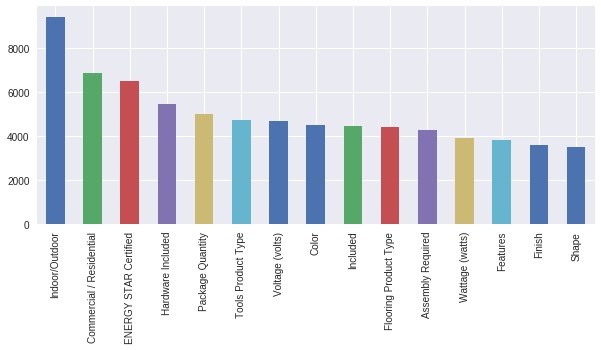

In [0]:
plt.figure(figsize=(10,4))
train_df.label.value_counts().plot(kind='bar');

This bar plot shows that Indoor / Outdoor label is significantly higher than others

In [0]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,8.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

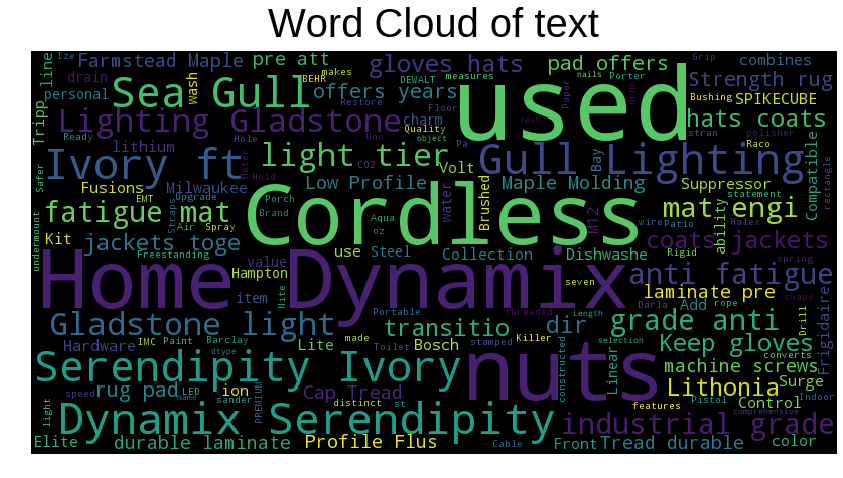

In [0]:
plot_wordcloud(train_df["text"], title="Word Cloud of text")

* Word Cloud shows that the text dataset we are working on is of household products and appliances.
* Home Dynamix company products are most frequently talked about.
* Most of the dataset is between the year 2008-2014 becouse cordless devices were famous at that time

In [0]:
train_df = train_df.drop_duplicates()

In [0]:
train_df.shape

(75153, 3)

In [0]:
def print_plot(index):
    example = train_df[train_df.index == index][['text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [0]:
print_plot(30)

The Cadet Pressure-Assisted Toilet really is the clear choice when shopping for a powerful and quiet pressure-assisted toilet. Using only 1.1 gal. of water per flush, the Cadet Pressure-Assisted Toilet produces a powerful flush. Available in a comfortable elongated bowl configuration, this toilet is a great addition to your residential or commercial bathroom.2-piece design features a separate tank and bowlPressure-assisted siphon jet action for a powerful flushHigh efficiency, ultra low consumptionEverClean surface inhibits the growth of stain and odor causing bacteria
Tag: Commercial / Residential


Cleaning the dataset by 
* Removing bad symbols by replacing them with space
* Removing Stopwords
* Converting all text to lowercase


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
  text = BeautifulSoup(text, "lxml").text # HTML decoding
  text = text.lower() # lowercase text
  text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
  text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
  text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
  return text


In [0]:
train_df['text'] = train_df['text'].apply(clean_text)


In [0]:
test_df['text'] = test_df['text'].apply(clean_text)

In [0]:
print_plot(30)

cadet pressure assisted toilet really clear choice shopping powerful quiet pressure assisted toilet using 1 1 gal water per flush cadet pressure assisted toilet produces powerful flush available comfortable elongated bowl configuration toilet great addition residential commercial bathroom 2 piece design features separate tank bowlpressure assisted siphon jet action powerful flushhigh efficiency ultra low consumptioneverclean surface inhibits growth stain odor causing bacteria
Tag: Commercial / Residential


In [0]:
X = train_df.text
y = train_df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [0]:
label_list = set(y)

<font size="4">Training on Naive Bayes Classifier</font><br>

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=label_list))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
accuracy 0.41297791182471394
                          precision    recall  f1-score   support

                  Finish       0.59      0.62      0.60      1280
         Voltage (volts)       0.78      0.18      0.29      1322
   ENERGY STAR Certified       0.35      0.47      0.40      2056
   Flooring Product Type       0.40      0.75      0.52      2008
                Features       0.46      0.19      0.27      1174
       Hardware Included       0.51      0.24      0.33      1095
        Package Quantity       0.09      0.00      0.00      1329
         Wattage (watts)       0.50      0.46      0.48      1665
                   Shape       0.37      0.25      0.30      1333
          Indoor/Outdoor       0.25      0.55      0.34      2839
       Assembly Required       0.61      0.45      0.52      1468
                   Color       0.52      0.17      0.26      1065
                Included       0.73      0.79   

Accuracy = 41% on naive bayes

<font size="4">Now training on linear Support Vector Machine</font><br>

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=label_list))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.48 µs
accuracy 0.4028652532600018
                          precision    recall  f1-score   support

                  Finish       0.54      0.71      0.61      1280
         Voltage (volts)       0.48      0.46      0.47      1322
   ENERGY STAR Certified       0.29      0.42      0.35      2056
   Flooring Product Type       0.44      0.40      0.42      2008
                Features       0.34      0.38      0.36      1174
       Hardware Included       0.44      0.36      0.40      1095
        Package Quantity       0.13      0.07      0.09      1329
         Wattage (watts)       0.45      0.44      0.44      1665
                   Shape       0.25      0.13      0.17      1333
          Indoor/Outdoor       0.31      0.21      0.25      2839
       Assembly Required       0.51      0.61      0.56      1468
                   Color       0.46      0.34      0.39      1065
                Included       0.59      0.92

Accuracy is 40% on Linear Support Vector Machine

In [0]:
# converting labels into one-hot encoding
Y_oh_train = pd.get_dummies(train_df.label)

In [0]:
cols = Y_oh_train.columns

In [0]:
#downloading GLOVE embedding from stanford website
!curl --header 'Host: nlp.stanford.edu' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --cookie '_ga=GA1.2.1265069218.1548967961; _gid=GA1.2.1213864711.1548967961; _gat=1' --header 'Upgrade-Insecure-Requests: 1' 'https://nlp.stanford.edu/data/glove.6B.zip' --output 'glove.6B.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  8  822M    8 67.4M    0     0  4251k      0  0:03:18  0:00:16  0:03:02 2223k^C


In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [0]:
X_train = train_df["text"].fillna("_na_").values  #replace missing values
y = Y_oh_train[cols].values
X_test = test_df["text"].fillna("_na_").values

In [0]:
maxlen = 200

In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [0]:
embed_size = 50 
max_features = 20000 

In [0]:
#preprocessing, i.e tokenizing train and test text datasets
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [0]:
#Using 50 dimensional glove embedding
EMBEDDING_FILE = 'glove.6B.50d.txt'

In [0]:
def get_coefs(word,*arr):
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE))

In [0]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

(0.020940498, 0.6441043)

In [0]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

<font size="5">Using a bidirectional LSTM and GLOVE embeddings to train the model</font><br>

In [0]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.2))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(15, activation="softmax")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_t, y, batch_size=128, epochs=1, validation_split=0.1);

Train on 67637 samples, validate on 7516 samples
Epoch 1/1
67637/67637 [==============================] - 494s 7ms/step - loss: 2.1232 - acc: 0.2586 - val_loss: 1.6799 - val_acc: 0.3756


In [0]:
model.save('first.h5')

In [0]:
model.fit(X_t, y, batch_size=128, epochs=1, validation_split=0.1);

Train on 67637 samples, validate on 7516 samples
Epoch 1/1
67637/67637 [==============================] - 492s 7ms/step - loss: 1.6562 - acc: 0.3821 - val_loss: 1.4610 - val_acc: 0.4333


In [0]:
model.save('second.h5')

Accuracy is coming out to be **45%** on validation set with just **2** epochs.

In [0]:
from keras.models import load_model
load_model('second.h5')

In [0]:
y_test = model.predict([X_te], batch_size=1024, verbose=1)

10393/10393 [==============================] - 4s 428us/step


In [0]:
submit = pd.read_csv('sample_submission.csv')

In [0]:
submit.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,183172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,217304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,184115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
all_classes = list(submit.columns)
all_classes.remove('id')

In [0]:
for i,j in zip(all_classes, range(0,16)):
    submit[i] = y_test[:,j]

In [0]:
submit.to_csv('final_submission.csv', index = False)

Further Improvements to do:
* Using stemming, lemmatization while preprocessing the data
* Training for more epochs for better accuracy